<a href="https://colab.research.google.com/github/shubhambhunia4/ML-Lab-Codes/blob/main/Drug(Q_7).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY

Missing values in each column:
 Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

✅ Data after encoding categorical values:
    Age  Sex  BP  Cholesterol  Na_to_K  Drug
0   23    0   0            0   25.355     4
1   47    1   1            0   13.093     2
2   47    1   1            0   10.114     2
3   28    0   2            0    7.798     3
4   61    0   1            0   18.043     4

🎯 Decision Tree Accuracy: 100.00%

Class Names (Drugs): ['drugA' 'drugB' 'drugC' 'drugX' 'drugY']

Confusion Matrix:
 [[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 15]]

Classification Report:
               precision    

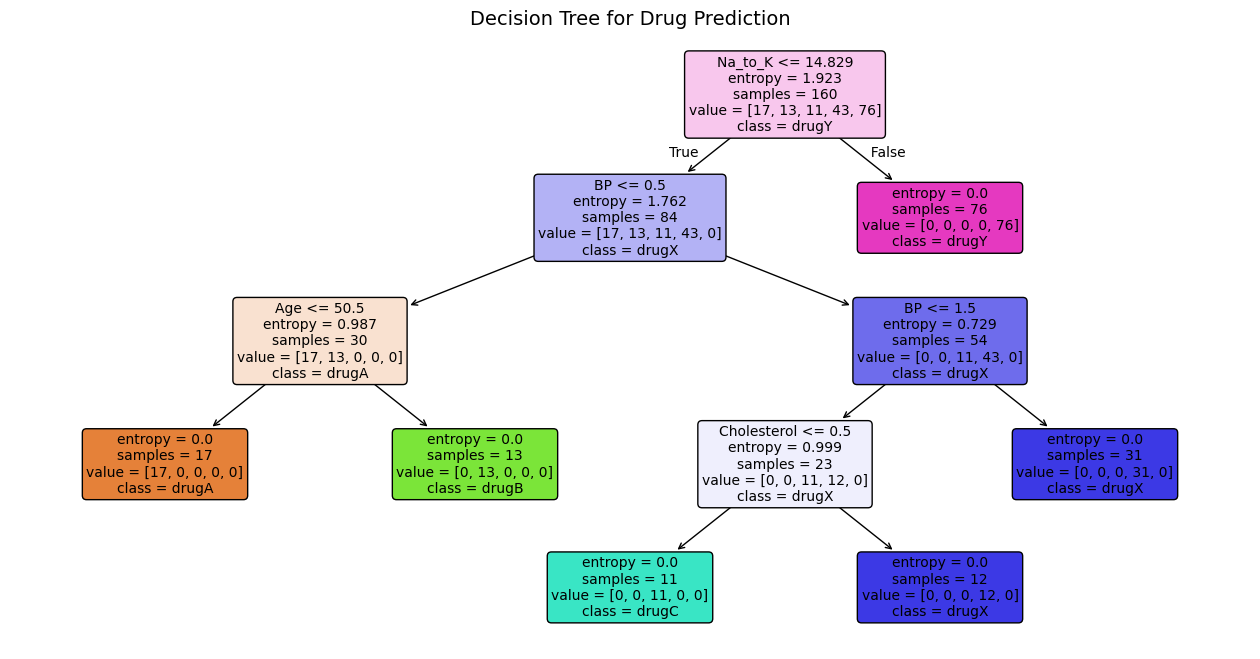


📊 Feature Importance:
 Na_to_K        0.519065
BP             0.310040
Age            0.096247
Cholesterol    0.074649
Sex            0.000000
dtype: float64


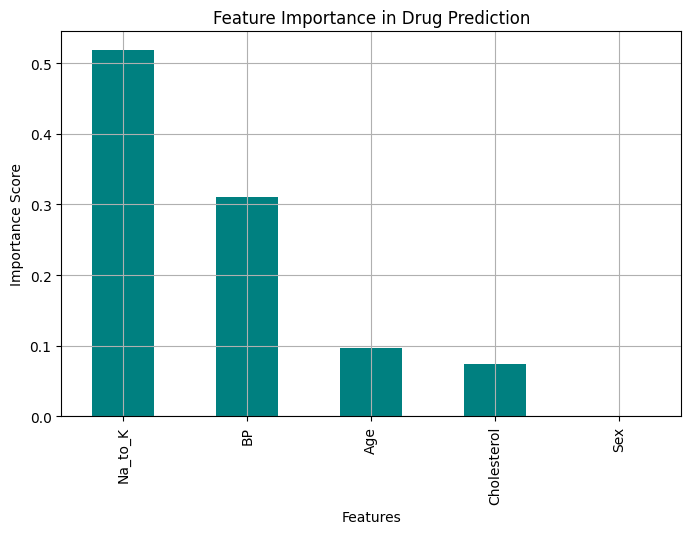

In [ ]:
# --- Import necessary libraries ---
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score # Import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# --- Step 1: Load the dataset ---
data = pd.read_csv("drug.csv")   # <-- Path to your uploaded file
#print("✅ Dataset loaded successfully!\n")
print(data.head())

# --- Step 2: Check for missing values ---
print("\nMissing values in each column:\n", data.isnull().sum())

# --- Step 3: Encode categorical columns ---
# We'll encode all object (text) columns so that ML can use them
label_encoders = {}

for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

print("\n✅ Data after encoding categorical values:\n", data.head())

# --- Step 4: Define Features (X) and Target (y) ---
# Assuming 'Drug' is the target column
X = data.drop('Drug', axis=1)
y = data['Drug']

# --- Step 5: Split data into training and testing sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Step 6: Train the Decision Tree model ---
dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt.fit(X_train, y_train)

# --- Step 7: Make predictions ---
y_pred = dt.predict(X_test)

# --- Step 8: Evaluate the model ---
accuracy = accuracy_score(y_test, y_pred)
print(f"\n🎯 Decision Tree Accuracy: {accuracy * 100:.2f}%")

# Decode original drug names for readability
drug_names = label_encoders['Drug'].inverse_transform(sorted(y.unique()))
print("\nClass Names (Drugs):", drug_names)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=drug_names))

# --- Step 9: Visualize the Decision Tree ---
plt.figure(figsize=(16, 8))
plot_tree(dt,
          feature_names=X.columns,
          class_names=drug_names,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree for Drug Prediction", fontsize=14)
plt.show()

# --- Step 10 (Optional): Show Feature Importance ---
import numpy as np
feature_importance = pd.Series(dt.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\n📊 Feature Importance:\n", feature_importance)

# Plot Feature Importance
plt.figure(figsize=(8,5))
feature_importance.plot(kind='bar', color='teal')
plt.title("Feature Importance in Drug Prediction")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("drug.csv")

In [ ]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [ ]:
print("\nMissing values in each column:\n", data.isnull().sum())



Missing values in each column:
 Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


In [ ]:
data.isnull()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
195,False,False,False,False,False,False
196,False,False,False,False,False,False
197,False,False,False,False,False,False
198,False,False,False,False,False,False


In [ ]:
label_encoders = {}

for column in data.columns:
    if data[column].dtype == 'object':
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column])
        label_encoders[column] = le

In [ ]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4


In [ ]:
print("\n✅ Data after encoding categorical values:\n", data.head())


✅ Data after encoding categorical values:
    Age  Sex  BP  Cholesterol  Na_to_K  Drug
0   23    0   0            0   25.355     4
1   47    1   1            0   13.093     2
2   47    1   1            0   10.114     2
3   28    0   2            0    7.798     3
4   61    0   1            0   18.043     4


In [ ]:
# Assuming 'Drug' is the target column
X = data.drop('Drug', axis=1)
y = data['Drug']

In [ ]:
# --- Step 5: Split data into training and testing sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# --- Step 6: Train the Decision Tree model ---
dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [ ]:
# --- Step 7: Make predictions ---
y_pred = dt.predict(X_test)

In [ ]:
# --- 8. Evaluate Model Performance ---
train_acc = accuracy_score(y_train, dt.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)

print("\n🎯 Decision Tree Model Performance")
print("---------------------------------")
print(f"Training Accuracy: {train_acc*100:.2f}%")
print(f"Testing Accuracy:  {test_acc*100:.2f}%")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Decode original drug names for readability in the classification report
drug_names_for_report = label_encoders['Drug'].inverse_transform(sorted(y_test.unique()))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=drug_names_for_report))


# --- 9. Prevent Overfitting using Max Depth ---
dt_pruned = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
dt_pruned.fit(X_train, y_train)
y_pred_pruned = dt_pruned.predict(X_test)

print("\n🌿 After Limiting Tree Depth (max_depth=4):")
print(f"Testing Accuracy: {accuracy_score(y_test, y_pred_pruned)*100:.2f}%")

# --- 10. Cross-Validation for More Reliable Accuracy ---
scores = cross_val_score(dt_pruned, X, y, cv=5)
print("\n📊 Cross-Validation Scores:", scores)
print(f"Average Cross-Validation Accuracy: {scores.mean()*100:.2f}%")


🎯 Decision Tree Model Performance
---------------------------------
Training Accuracy: 100.00%
Testing Accuracy:  100.00%

Confusion Matrix:
[[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 15]]

Classification Report:
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11
       drugY       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40


🌿 After Limiting Tree Depth (max_depth=4):
Testing Accuracy: 100.00%

📊 Cross-Validation Scores: [1.    1.    1.    0.925 1.   ]
Average Cross-Validation Accuracy: 98.50%


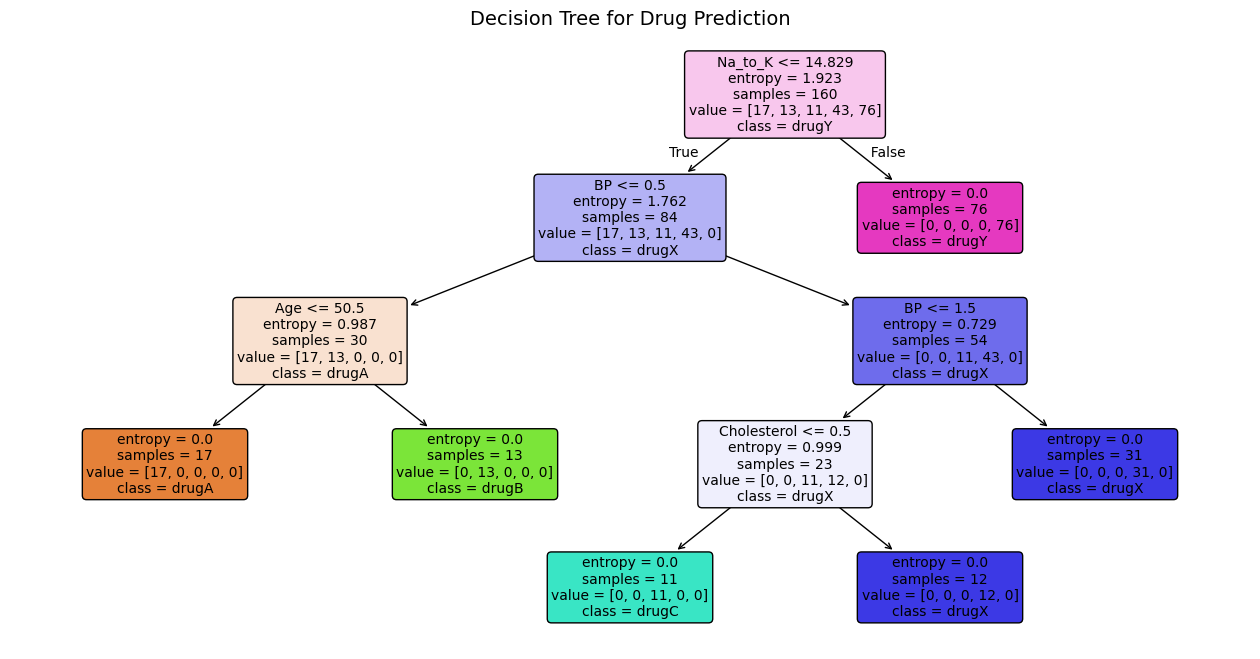

In [ ]:
# --- Step 9: Visualize the Decision Tree ---
plt.figure(figsize=(16, 8))
plot_tree(dt,
          feature_names=X.columns,
          class_names=drug_names,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree for Drug Prediction", fontsize=14)
plt.show()


📊 Feature Importance:
 Na_to_K        0.519065
BP             0.310040
Age            0.096247
Cholesterol    0.074649
Sex            0.000000
dtype: float64


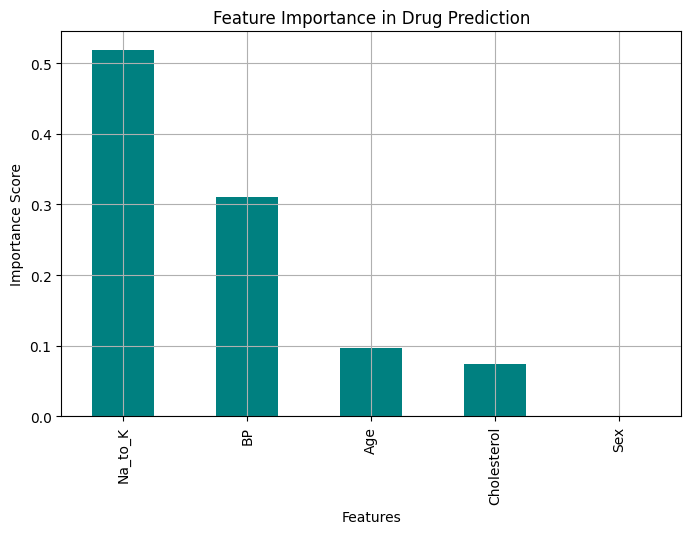

In [ ]:
# --- Step 10 (Optional): Show Feature Importance ---
import numpy as np
feature_importance = pd.Series(dt.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\n📊 Feature Importance:\n", feature_importance)

# Plot Feature Importance
plt.figure(figsize=(8,5))
feature_importance.plot(kind='bar', color='teal')
plt.title("Feature Importance in Drug Prediction")
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.grid(True)
plt.show()
